## Notebook Objectives

Holy data structures, batman.  As a new Pythonista, I find myself in a state of bewilderment about all these data structures I haven't worked with. Lists. Tuples. Dictionaries. Oh my. 

Lately, I've been reading the amazing book, "Python for Everybody"[https://www.py4e.com] by Charles Severance.  One of the chapter goes into detail about Python dictionaries and how they are useful for counting.  I'm also a lover of music, so what better application of a Python dictionary than playing with some data from Spotify!  


My objectives are as follows: 
1. Use Spotify's API to export data
2. Work with a Python dictionary to learn more about the data structure and produce a visualization of the results

### Notebook Conclusions

### Imports

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
# import ggplot as gg
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import spotipy
import spotipy.util as util
import sys
from collections import OrderedDict
from datetime import date

### Spotify API 

It appears that the Spotify API requires authorization for all requests (even those not tied to a user account). So I need to go through the OAuth process to pull data. 

First, I need to set up my client id, cleint secret, and redirect URL as strings. In my bash_profile, I set the client ID & client secret as enviroment variables. I decided to assign the redirect_uri locally so that I could experiment with that value if I'd like. 

In [73]:
client_id = os.environ.get("SPOTIPY_CLIENT_ID")
client_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")
redirect_uri = 'http://localhost:8888/callback/'

Depending on which data we are trying to access, we need to specify a scope to pass to the token.  Spotify has documentaiton on which scopes are relevant to each function. 

In [74]:
scope = 'user-top-read'

This is where the authorization happens with Spotify.  It was a bit clunky for my first authorization, it prompted me to paste the redirect_uri into jupyter before fully authenitcating.  It was very satisfying to have the Spotify window pop up and ask to verify credentails.  Also shout out to my wonderful husband for letting me use his Spotify account for developer purposes, as I forgot the password to my account. 

In [75]:
username = input("Enter spotify email: ")

Enter spotify email: alirezhadi@gmail.com


In [107]:
token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri)

In [78]:
# print(token) 

Let's actually pull data! First, we need to pass our token to Spotify.  Then, we specify a list of ranges that we can pass to the current_user_top_artists function.    This code was modelled of this example[https://github.com/plamere/spotipy/blob/master/examples/my_top_artists.py]. 

In [108]:
sp = spotipy.Spotify(auth=token)
sp.trace = False
ranges = ['short_term', 'medium_term', 'long_term']
for range in ranges:
    print("range:", range)
    results = sp.current_user_top_artists(time_range=range, limit=50)
    for i, item in enumerate(results['items']):
        print(i, item['name'])
        print

range: short_term
0 Four Tet
1 Brand New
2 Death Cab for Cutie
3 Above & Beyond
4 Notaker
5 Space Jesus
6 JOYRYDE
7 deadmau5
8 Boards of Canada
9 My Morning Jacket
range: medium_term
0 Andrew Bird
1 Biosphere
2 Sigur Rós
3 Loscil
4 deadmau5
5 Ramin Djawadi
6 Four Tet
7 Ensemble Economique
8 Jon Hopkins
9 Shlohmo
10 Brian Eno
11 Lawrence English
12 DIIV
13 Moby
14 Virtual Self
15 Bing & Ruth
16 Above & Beyond
17 TOKiMONSTA
18 James Newton Howard
19 Shakey Graves
20 Alex Somers
21 Si Begg
22 Mat Zo
23 Hans Zimmer
24 Cirez D
25 Frightened Rabbit
26 Rutger Zuydervelt
27 Flying Lotus
28 My Morning Jacket
29 Skee Mask
30 Pryda
31 ATTLAS
32 Midnight Tyrannosaurus
33 Freescha
34 Lee Noble
35 Machinefabriek
36 Bernard Herrmann
37 This Will Destroy You
38 Murcof
39 Brian McBride
40 ZHU
41 Norm Chambers
42 Brand New
43 No Mana
44 Heyz
45 Bonobo
46 Do Make Say Think
47 Rezz
48 Ochre
49 Hammock
range: long_term
0 Sigur Rós
1 36
2 Nine Inch Nails
3 Carbon Based Lifeforms
4 Matt Lange
5 Loscil
6 Andr

Nice! The for loop printed the ranking and artist name for the three time ranges.  This format isn't super consumable, so let's do some work. 

In [80]:
type(results) # check type of output

dict

Here we see that the type of 'results' is a dictionary.  A Python dictionary is made up of key-value pairs. 

I like working with data frames. I would like to construct a data frame that contains the range as a column and has artists for all three ranges. I will need to do additinal work to extract the genre data. Because I have three ranges, I will write a function, then call it, passing the string for each time range.  This could also probably be done via a for loop.

In [152]:
ranges = ['short_term','medium_term','long_term']
print(ranges)

['short_term', 'medium_term', 'long_term']


In [146]:
for i in range(3):
    print(ranges[i])

short_term
medium_term
long_term


In [148]:
for i in range(3):
    print(ranges[i])
    spot_dict =  sp.current_user_top_artists(time_range=ranges[i], limit=50)
    df_i = pd.DataFrame(spot_dict['items'])
    df_i = df1.assign(time_ranges = ranges) 
    #print("df done")

short_term
medium_term
long_term


In [165]:
d = {}
for term in ranges:
    print(term)
    spot_dict =  sp.current_user_top_artists(time_range=term, limit=50)
    df = pd.DataFrame(spot_dict['items'])
    df = df.assign(time_ranges = term)
    d[term] = df
print("done!")

short_term
medium_term
long_term
done!


In [156]:
d['short_term']

,external_urls,followers,genres,href,id,images,name,popularity,type,uri,time_ranges
0,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 275925}","[alternative dance, chamber psych, electronic,...",https://api.spotify.com/v1/artists/7Eu1txygG6n...,7Eu1txygG6nJttLHbZdQOh,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Four Tet,63,artist,spotify:artist:7Eu1txygG6nJttLHbZdQOh,short_term
1,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 472440}",[pop punk],https://api.spotify.com/v1/artists/168dgYui7Ex...,168dgYui7ExaU612eooDF1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Brand New,63,artist,spotify:artist:168dgYui7ExaU612eooDF1,short_term
2,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 917663}","[chamber pop, folk-pop, indie folk, indie pop,...",https://api.spotify.com/v1/artists/0YrtvWJMgSd...,0YrtvWJMgSdVrk3SfNjTbx,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Death Cab for Cutie,70,artist,spotify:artist:0YrtvWJMgSdVrk3SfNjTbx,short_term
3,{'spotify': 'https://open.spotify.com/artist/1...,"{'href': None, 'total': 442284}","[edm, progressive house, progressive trance, t...",https://api.spotify.com/v1/artists/10gzBoINW3c...,10gzBoINW3cLJfZUka8Zoe,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Above & Beyond,68,artist,spotify:artist:10gzBoINW3cLJfZUka8Zoe,short_term
4,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 10505}","[catstep, chillstep, complextro, edm, electro ...",https://api.spotify.com/v1/artists/0I7HgbIetYE...,0I7HgbIetYEIweWq7nD6En,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Notaker,45,artist,spotify:artist:0I7HgbIetYEIweWq7nD6En,short_term
5,{'spotify': 'https://open.spotify.com/artist/5...,"{'href': None, 'total': 36360}","[brostep, edm, electro house, electronic trap]",https://api.spotify.com/v1/artists/5AoXSiM511L...,5AoXSiM511L4To0AN5oZVB,"[{'height': 1000, 'url': 'https://i.scdn.co/im...",Space Jesus,52,artist,spotify:artist:5AoXSiM511L4To0AN5oZVB,short_term
6,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 69950}","[brostep, edm, electro house, electronic trap,...",https://api.spotify.com/v1/artists/24neLwyYRyj...,24neLwyYRyj4ItaGnFeIT0,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",JOYRYDE,59,artist,spotify:artist:24neLwyYRyj4ItaGnFeIT0,short_term
7,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 2104734}","[big room, edm, electro house, progressive house]",https://api.spotify.com/v1/artists/2CIMQHirSU0...,2CIMQHirSU0MQqyYHq0eOx,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",deadmau5,70,artist,spotify:artist:2CIMQHirSU0MQqyYHq0eOx,short_term
8,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 260037}","[ambient, electronic, fourth world, indietroni...",https://api.spotify.com/v1/artists/2VAvhf61GgL...,2VAvhf61GgLYmC6C8anyX1,"[{'height': 902, 'url': 'https://i.scdn.co/ima...",Boards of Canada,59,artist,spotify:artist:2VAvhf61GgLYmC6C8anyX1,short_term
9,{'spotify': 'https://open.spotify.com/artist/4...,"{'href': None, 'total': 302025}","[alternative country, alternative rock, folk-p...",https://api.spotify.com/v1/artists/43O3c6wewpz...,43O3c6wewpzPKwVaGEEtBM,"[{'height': 672, 'url': 'https://i.scdn.co/ima...",My Morning Jacket,58,artist,spotify:artist:43O3c6wewpzPKwVaGEEtBM,short_term


In [174]:
def artist_plot(term):
    df = d[term]
    plt.bar(df['name'],df['popularity'])
    plt.show()

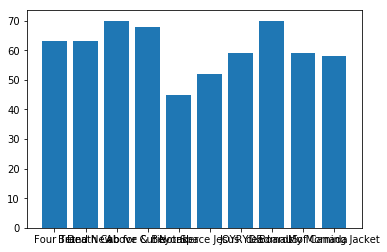

In [175]:
artist_plot('short_term')

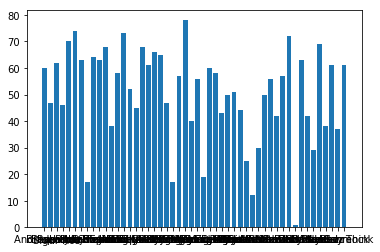

In [177]:
artist_plot('medium_term')

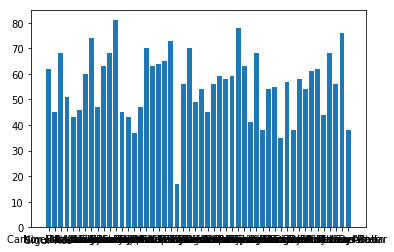

In [176]:
artist_plot('long_term')

In [171]:
df = d['short_term']
plt.bar(x=df.name, y=df.popularity, data=df)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [15]:
print(results['items'][0]["name"])
print(results['items'][0]["genres"])

Sigur Rós
['bow pop', 'chamber pop', 'compositional ambient', 'dream pop', 'ethereal wave', 'icelandic pop', 'icelandic rock', 'indie folk', 'melancholia', 'post-rock']


Python is quite the learning curve. The output I want is to cycle through each key-value pair in the results dictionary, extract the items list, then extract the key-value pairs for name & genre.  I want to story this output in a new dictionary where the key is the artist and the value is the list of genres.  For loops should be helpful for this task, but I will need to practice. 